In [1]:
# import stuff
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('ticks')
%matplotlib inline

In [520]:
sns.set_context("talk")

In [3]:
df3 = pd.read_csv('highered_00002.csv', dtype={'REFID': str},na_values=[96, 99, 98, 9996, 9998 , 9999, 999996, 999998, 999999, 9999998, 9999999] )

In [5]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217502 entries, 0 to 217501
Data columns (total 33 columns):
PERSONID    217502 non-null int64
REFID       217502 non-null object
YEAR        217502 non-null int64
WEIGHT      217492 non-null float64
SAMPLE      217502 non-null int64
SURID       217502 non-null int64
AGE         217502 non-null int64
BIRYR       217502 non-null int64
GENDER      217502 non-null int64
MINRTY      217502 non-null int64
RACETH      217502 non-null int64
BTHUS       217502 non-null int64
CTZUSIN     217502 non-null int64
CTZUS       197697 non-null float64
FNVS        22280 non-null float64
CHTOT       95166 non-null float64
BA03Y5      211048 non-null float64
NBAMED      210399 non-null float64
NBAMEMG     211051 non-null float64
DGRDG       217502 non-null int64
HD03Y5      217502 non-null int64
NDGMED      217502 non-null int64
NDGMEMG     217502 non-null int64
LFSTAT      217502 non-null int64
WRKG        217502 non-null int64
HRSWKGR     186020 non-nul

In [4]:
df = df3.drop(['REFID'], axis=1)

In [6]:
# explanation of the survey https://highered.ipums.org/highered/survey_designs.shtml

# Respondents from each of these three surveys with science or engineering degrees                               ##
# or occupations are compiled into one dataset: the SESTAT (the Scientists and Engineers Statistical Data System)##

df.head(3)


,PERSONID,YEAR,WEIGHT,SAMPLE,SURID,AGE,BIRYR,GENDER,MINRTY,RACETH,...,LFSTAT,WRKG,HRSWKGR,WKSWKGR,OCEDRLP,NOCPR,NOCPRMG,SALARY,CPI2009C,JOBSATIS
0,50000030000000003,2003,372.6047,601,1,47,1955,1,0,2,...,1,1,3.0,3.0,1.0,282885.0,2.0,35000.0,1.166,1.0
1,50000030000000004,2003,341.7484,601,1,66,1935,2,0,2,...,1,1,3.0,4.0,1.0,412320.0,4.0,66000.0,1.166,2.0
2,50000030000000005,2003,522.5629,601,1,60,1940,1,0,2,...,1,1,4.0,4.0,3.0,621995.0,6.0,102000.0,1.166,1.0


In [6]:
#how many people are employed?
LF_map = {1: 'Employed', 2: 'Unemployed', 3: 'Unemployed'}
df['LFSTATS'] = df['LFSTAT'].map(LF_map)
df.groupby('SAMPLE')['LFSTATS'].value_counts().unstack()

LFSTATS,Employed,Unemployed
SAMPLE,,
601,52661,8975
602,26145,3770
603,9163,1636
1001,71374,13082
1002,26677,4019


In [10]:
#change the minority column to string containing the actual value
min_map = {0: 'Not minority', 1: 'Minority'}
df['MNTRS'] = df['MINRTY'].map(min_map)

In [7]:
#change the gender column to string containing the actual 'female' or 'male' value
gen_map = {1: 'Female', 2: 'Male'}
df['GENDERS'] = df['GENDER'].map(gen_map)

In [387]:
major_map = {1: 'Computer/Maths Sciences', 2: 'Bio., Agr. and Env. sciences', 3: 'Physical Sciences', 4: 'Social Sciences', 5: 'Engineering', 6: 'Science and engineering-related fields', 7: 'Non-science and engineering fields' }
df['MajorS'] = df['NDGMEMG'].map(major_map)

In [389]:
job_map = {1: 'Computer/Maths Sciences', 2: 'Bio., Agr. and Env. sciences', 3: 'Physical Sciences', 4: 'Social Sciences', 5: 'Engineering', 6: 'Science and engineering-related fields', 7: 'Non-science and engineering fields' }
df['JobS'] = df['NOCPRMG'].map(job_map)

In [22]:
#change the race column to string containing the actual value
race_map = {1: 'Asian', 2: 'White', 3: 'Other Minorities', 4: 'Other'}
df['RACES'] = df['RACETH'].map(race_map)

In [16]:
#change the birth in US column to string containing the actual value
birth_map = {0: 'Not in the US', 1: 'Born in the US'}
df['BUSS'] = df['BTHUS'].map(birth_map)

In [28]:
df = df.drop(['MINRTY','GENDER','RACETH','BTHUS','FNVS', 'CHTOT', 'BA03Y5'],axis=1)

ValueError: labels ['MINRTY' 'GENDER' 'RACETH' 'BTHUS' 'FNVS' 'CHTOT' 'BA03Y5'] not contained in axis

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217502 entries, 0 to 217501
Data columns (total 30 columns):
PERSONID    217502 non-null int64
YEAR        217502 non-null int64
WEIGHT      217492 non-null float64
SAMPLE      217502 non-null int64
SURID       217502 non-null int64
AGE         217502 non-null int64
BIRYR       217502 non-null int64
CTZUSIN     217502 non-null int64
CTZUS       197697 non-null float64
NBAMED      210399 non-null float64
NBAMEMG     211051 non-null float64
DGRDG       217502 non-null int64
HD03Y5      217502 non-null int64
NDGMED      217502 non-null int64
NDGMEMG     217502 non-null int64
LFSTAT      217502 non-null int64
WRKG        217502 non-null int64
HRSWKGR     186020 non-null float64
WKSWKGR     186020 non-null float64
OCEDRLP     186020 non-null float64
NOCPR       186020 non-null float64
NOCPRMG     186020 non-null float64
SALARY      186020 non-null float64
CPI2009C    217502 non-null float64
JOBSATIS    186020 non-null float64
LFSTATS     217

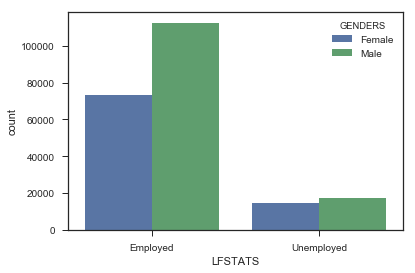

In [8]:
#count plot of employed and unemployed entries for genders.
sns.countplot(x='LFSTATS', data = df, hue='GENDERS')

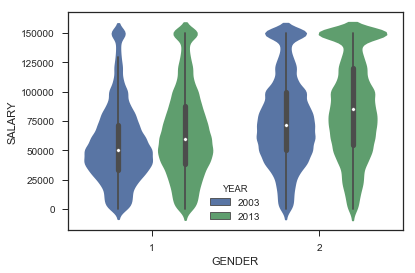

In [9]:
#violin plot of gender and salary 
sns.violinplot(data=df, y = 'SALARY', x = 'GENDER', hue = 'YEAR')

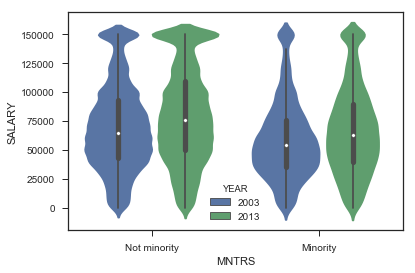

In [11]:
#Compare and visualize the minority factor
sns.violinplot(data=df, y = 'SALARY', x = 'MNTRS', hue = 'YEAR')

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

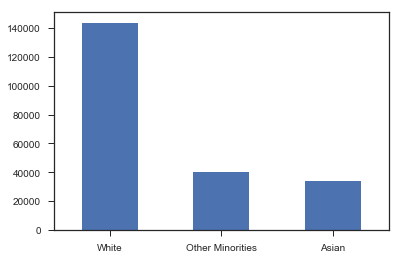

In [12]:
#plot the number of entries for each race
df['RACES'].value_counts().plot(kind='bar')
plt.xticks(rotation=0)

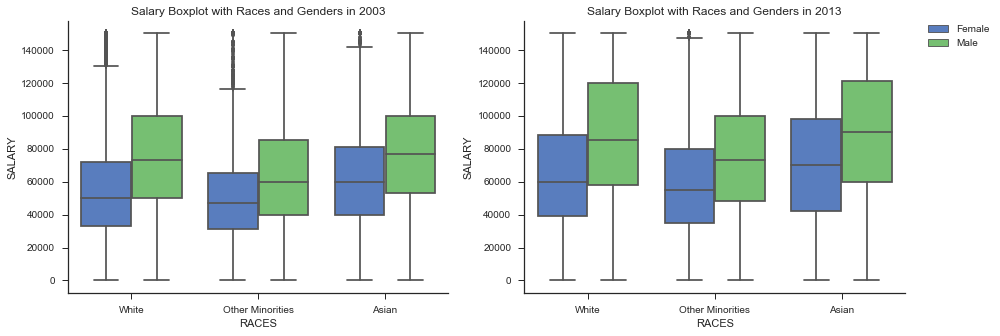

In [15]:

fig, axs = plt.subplots(ncols=2, figsize=(15,5))

#Compare and plot the SALARY of races and genders from year 2003 
sns.boxplot(data=df[df['YEAR']==2003], y = 'SALARY', x = 'RACES', hue = 'GENDERS', palette="muted", ax=axs[0])
axs[0].legend().remove()
axs[0].set_title('Salary Boxplot with Races and Genders in 2003')


#Compare and plot the SALARY of races and genders from year 2013 
sns.boxplot(data=df[df['YEAR']==2013], y = 'SALARY', x = 'RACES', hue = 'GENDERS', palette="muted", ax=axs[1])
axs[1].legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
axs[1].set_title('Salary Boxplot with Races and Genders in 2013')
sns.despine()


(array([0, 1]), <a list of 2 Text xticklabel objects>)

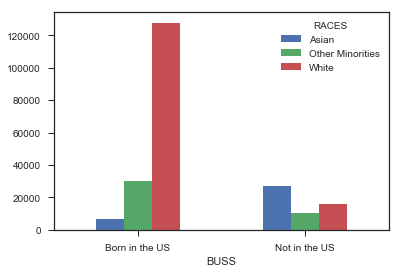

In [17]:
#countplot of entries of whether was born in US for each races.
df.groupby('BUSS')['RACES'].value_counts().unstack().plot(kind='bar')
plt.xticks(rotation=0)

In [47]:
df['SAMPLE'].value_counts()

1001    84456
601     61636
1002    30696
602     29915
603     10799
Name: SAMPLE, dtype: int64

In [18]:
#a new data frame for SDR only 
df_SDR = df[(df['SAMPLE']==602) | (df['SAMPLE']==1002)]

In [19]:
df_SDR['SALARY'].min()

0.0

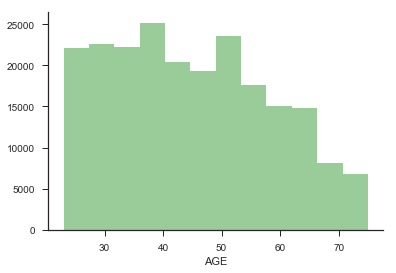

In [20]:
#histogram for ages
sns.distplot(df['AGE'],kde=False,color='green',bins=12)
sns.despine()

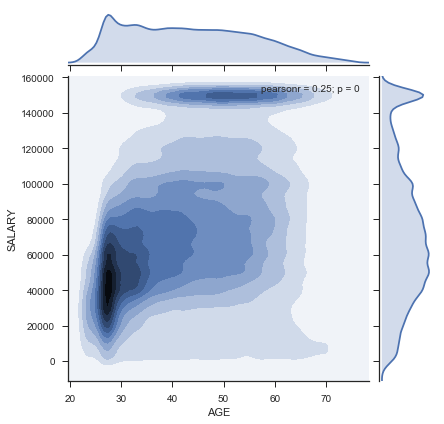

In [21]:
#KDE pair plot with Age and SALARY. It is shown that younger people makes less money generally. 
#Their Salary go up when they turn older until aounr 50 years old. 
sns.jointplot(x='AGE',y='SALARY',data=df, kind='kde')

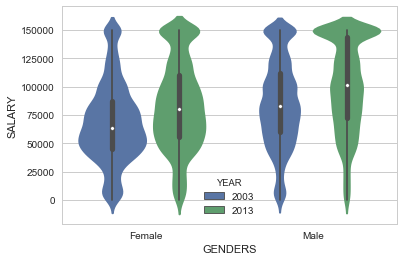

In [29]:
#Salary violin plot for genders in year 2003 and 2013

sns.violinplot(data=df_SDR, y = 'SALARY', x = 'GENDERS', hue = 'YEAR')

In [339]:
df_2003 = df[df['YEAR']==2003]

In [340]:
df_2013 = df[df['YEAR']==2013]

In [341]:
df_2003['GENDERS'].value_counts()

Male      64520
Female    37830
Name: GENDERS, dtype: int64

In [342]:
df_2013['GENDERS'].value_counts()

Male      65233
Female    49919
Name: GENDERS, dtype: int64

In [343]:
df_2013[df_2013['SAMPLE']==1002]['GENDERS'].value_counts()

Male      19403
Female    11293
Name: GENDERS, dtype: int64

In [344]:
df_2003[df_2003['SAMPLE']==602]['GENDERS'].value_counts()

Male      20484
Female     9431
Name: GENDERS, dtype: int64

In [345]:
df_SDR = df[(df['SAMPLE']==602) | (df['SAMPLE']==1002)]

/anaconda/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


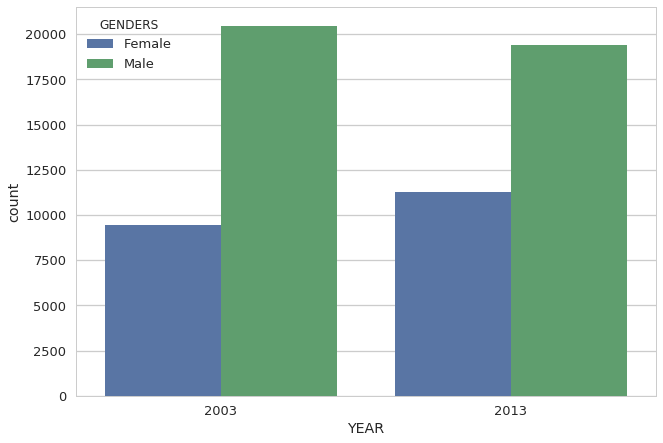

In [464]:
sns.countplot(x='YEAR',data=df_SDR,hue='GENDERS')

In [256]:
df_CR = df[(df['SAMPLE']==601) | (df['SAMPLE']==603) | (df['SAMPLE']==1001)]

/anaconda/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


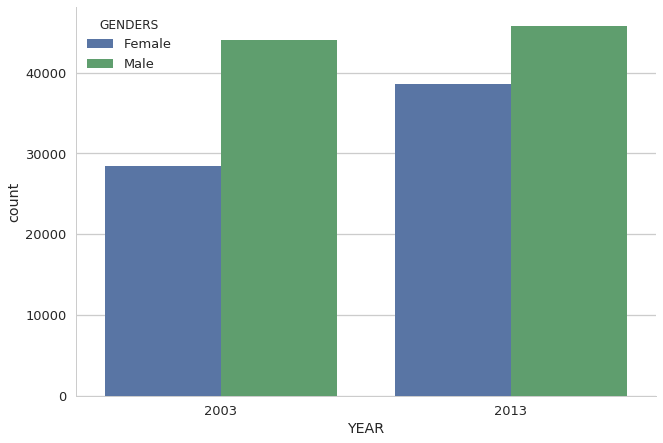

In [465]:
#count plot of total number of the genders for the year 2003 and 2013. 
sns.countplot(x='YEAR',data=df_CR,hue='GENDERS')
sns.despine()

/anaconda/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


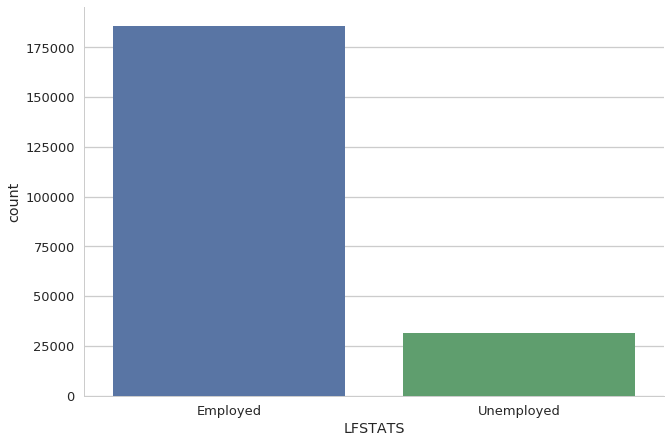

In [466]:
sns.countplot(df['LFSTATS'])
sns.despine()

In [294]:
df_CR_2003 = df[df['SAMPLE']==601]
df_CR_2013 = df[df['SAMPLE']==1001]
df_NCR_2003 = df[df['SAMPLE']==603]
df_SDR_2003 = df[df['SAMPLE']==602]
df_SDR_2013 = df[df['SAMPLE']==1002]

In [485]:
employ_CR = df_CR.groupby('GENDERS')['LFSTATS'].value_counts(normalize=True).unstack()
employ_CR.reset_index()
employ_CR_melt = pd.melt(employ_CR.reset_index(), id_vars ='GENDERS')
employed_CR_melt = employ_CR_melt[employ_CR_melt['LFSTATS']=='Employed']
employed_CR_melt['Degree'] = 'Undergraduate'
employed_CR_melt

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,GENDERS,LFSTATS,value,Degree
0,Female,Employed,0.823051,Undergraduate
1,Male,Employed,0.868326,Undergraduate


In [484]:
employ_SDR = df_SDR.groupby('GENDERS')['LFSTATS'].value_counts(normalize=True).unstack()
employ_SDR.reset_index()
employ_SDR_melt = pd.melt(employ_SDR.reset_index(), id_vars ='GENDERS')
employed_SDR_melt = employ_SDR_melt[employ_SDR_melt['LFSTATS']=='Employed']
employed_SDR_melt['Degree'] = 'Graduate'
employed_SDR_melt

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,GENDERS,LFSTATS,value,Degree
0,Female,Employed,0.879994,Graduate
1,Male,Employed,0.867074,Graduate


In [486]:
employed = pd.concat([employed_CR_melt,employed_SDR_melt])

/anaconda/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


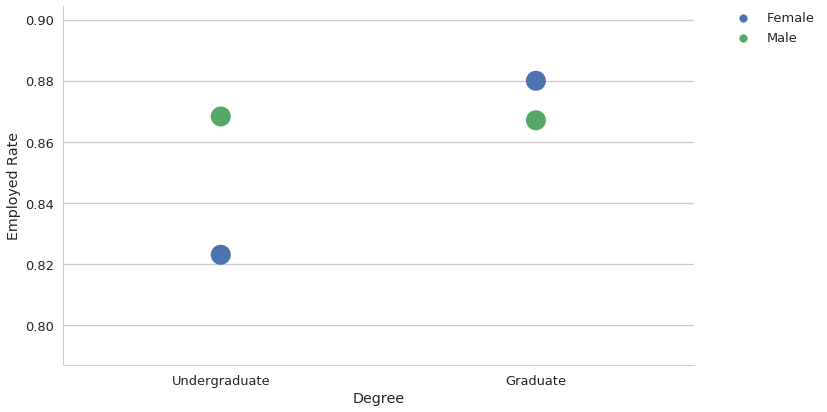

In [509]:
plt.figure(figsize=(10,6))
sns.stripplot(x='Degree', y='value', data=employed, hue='GENDERS', size =20)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
sns.despine()
plt.tight_layout()
plt.ylabel('Employed Rate')

/anaconda/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


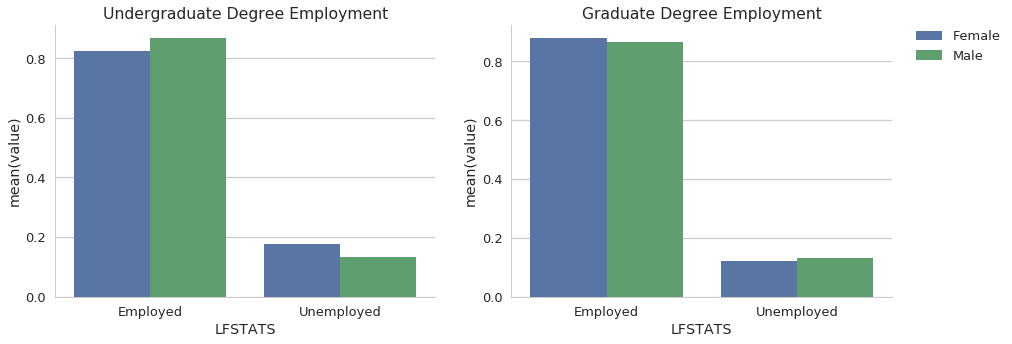

In [468]:
fig, axs = plt.subplots(ncols=2, figsize=(15,5))

#Compare and plot the employment percentage for male and female college graduates
sns.barplot(x='LFSTATS', y='value', data=employ_CR_melt, hue='GENDERS', ax=axs[0])
axs[0].legend().remove()
axs[0].set_title('Undergraduate Degree Employment')


#Compare and plot the employment percentage for male and female doctor graduates
sns.barplot(x='LFSTATS', y='value', data=employ_SDR_melt, hue='GENDERS', ax=axs[1])
axs[1].set_title('Graduate Degree Employment')
axs[1].legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
sns.despine()


In [411]:
employ_by_mj= df.groupby('NDGMEMG')['LFSTATS'].value_counts(normalize=True).unstack().reset_index()
employ_by_mj

LFSTATS,NDGMEMG,Employed,Unemployed
0,1,0.866894,0.133106
1,2,0.838543,0.161457
2,3,0.835273,0.164727
3,4,0.828773,0.171227
4,5,0.879707,0.120293
5,6,0.850083,0.149917
6,7,0.886577,0.113423


/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


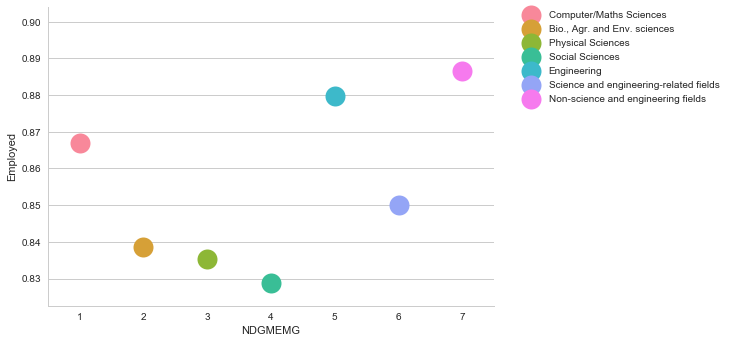

In [428]:
#Plot normalized results of job placement for the majors
# Without regression fit:
sns.stripplot(x="NDGMEMG", y="Employed", data=employ_by_mj, size =20)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
sns.despine()
plt.legend(['Computer/Maths Sciences', 'Bio., Agr. and Env. sciences', 'Physical Sciences', 'Social Sciences', 'Engineering', 'Science and engineering-related fields', 'Non-science and engineering fields'], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [426]:
employ_female_2003 = df_2003[df_2003['GENDERS']=='Female'].groupby('NDGMEMG')['LFSTATS'].value_counts(normalize=True).unstack().reset_index()

In [445]:
employ_female_2013 = df_2013[df_2013['GENDERS']=='Female'].groupby('NDGMEMG')['LFSTATS'].value_counts(normalize=True).unstack().reset_index()

/anaconda/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


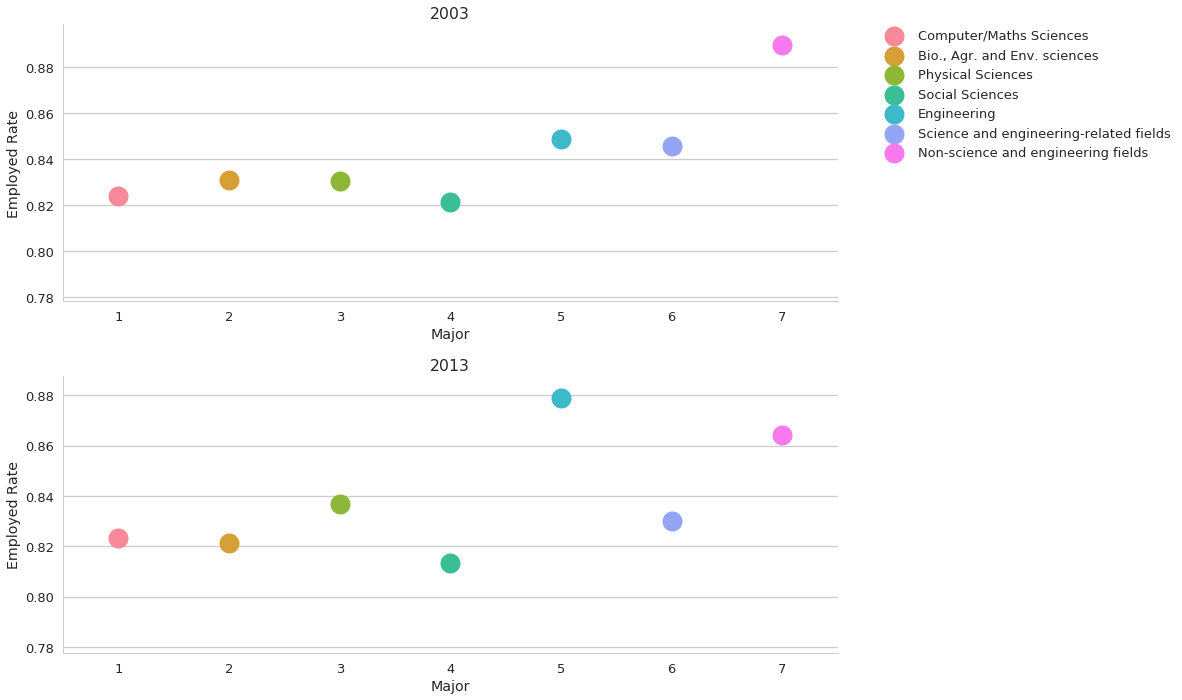

In [463]:
fig, axs = plt.subplots(nrows=2, figsize=(12,10))

#Compare and plot the employment percentage for male and female college graduates
sns.stripplot(x="NDGMEMG", y="Employed", data=employ_female_2003, size =20, ax=axs[0])
axs[0].set_title('2003')
axs[0].set_xlabel('Major')
axs[0].set_ylabel('Employed Rate')
axs[0].legend(['Computer/Maths Sciences', 'Bio., Agr. and Env. sciences', 'Physical Sciences', 'Social Sciences', 'Engineering', 'Science and engineering-related fields', 'Non-science and engineering fields'],bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

#Compare and plot the employment percentage for male and female doctor graduates
sns.stripplot(x="NDGMEMG", y="Employed", data=employ_female_2013, size =20, ax=axs[1])
axs[1].set_title('2013')
axs[1].set_xlabel('Major')
axs[1].set_ylabel('Employed Rate')
sns.despine()
plt.tight_layout()

In [390]:
df_job_gender = df.groupby('JobS')['GENDERS'].value_counts(normalize=True).unstack().reset_index()
df_job_gender_melt = pd.melt(df_job_gender, id_vars ='JobS')

/anaconda/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


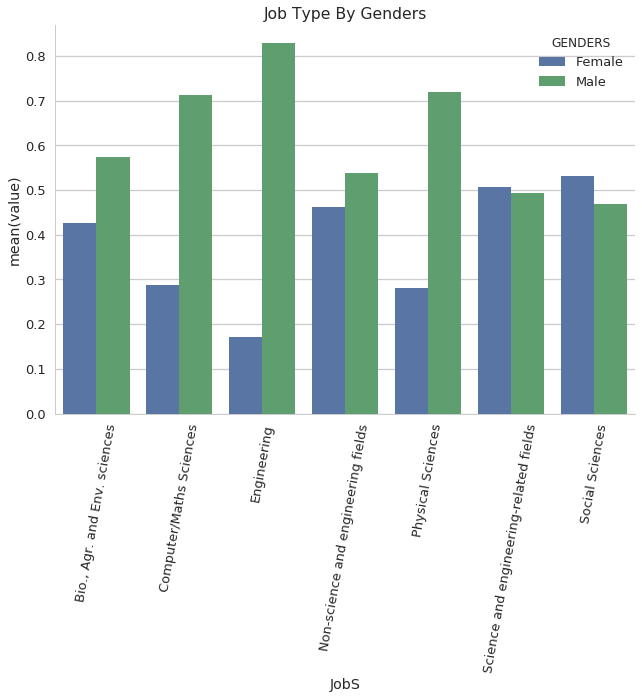

In [510]:
#Compare and plot the employment percentage for male and female college graduates
sns.barplot(x='JobS', y='value', data=df_job_gender_melt, hue='GENDERS')
plt.title('Job Type By Genders')
plt.xticks(rotation=80)
sns.despine()
#look at detailed group for explanation https://highered.ipums.org/highered-action/variables/NOCPR#codes_section 

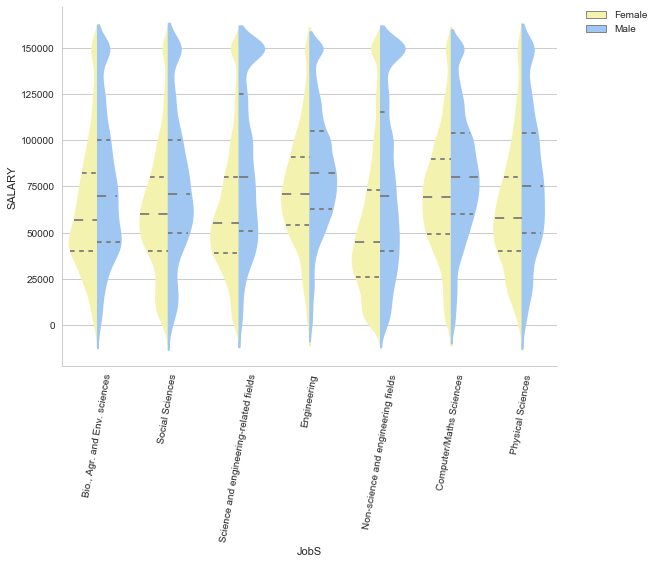

In [526]:
#plot of salary VS type of job 
plt.figure(figsize=(8,8))
sns.violinplot(x="JobS", y="SALARY", hue="GENDERS", data=df, split=True,
               inner="quart", palette={"Male": "b", "Female": "y"})
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xticks(rotation=80)
sns.despine()
plt.tight_layout()

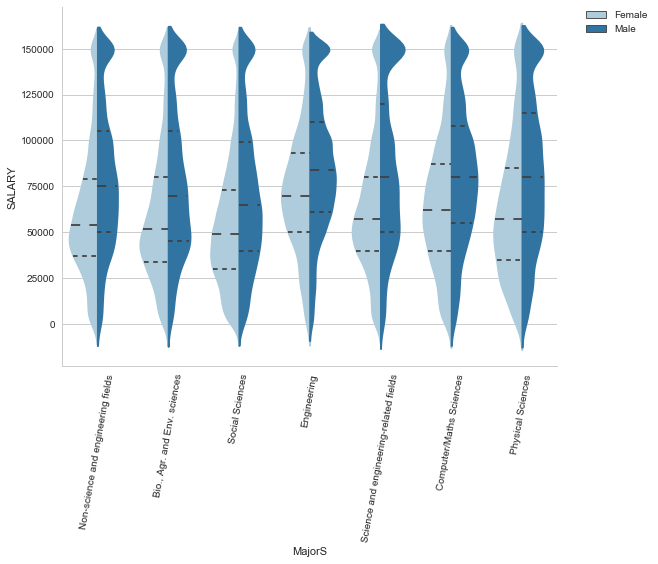

In [529]:
#plot of salary  major
plt.figure(figsize=(8,8))
sns.violinplot(x="MajorS", y="SALARY", hue="GENDERS", data=df, split=True,
               inner="quart")
plt.xticks(rotation=80)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
sns.despine()
plt.tight_layout()